In [1]:
setwd("/dh-projects/ag-conrad/analysis/saal11/panfib/kuppe")

In [2]:
library(Seurat)
library(harmony)
library(ggplot2)
library(openxlsx)

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp



In [ ]:
#Upload the three objects

In [10]:
load("/dh-projects/ag-conrad/analysis/saal11/panfib/data_kuppe_CD10pos.RData")

In [11]:
load("/dh-projects/ag-conrad/analysis/saal11/panfib/data_kuppe_CD10neg.RData")

In [12]:
load("/dh-projects/ag-conrad/analysis/saal11/panfib/data_kuppe_PDGRFA.RData")

In [18]:
data_kuppe_PDGRFA

An object of class Seurat 
58228 features across 35822 samples within 1 assay 
Active assay: RNA (58228 features, 0 variable features)
 2 layers present: counts, data

In [13]:
#Update objects
data_kuppe_PDGRFA <- UpdateSeuratObject(data_kuppe_PDGRFA)
data_kuppe_neg <- Kuppe_neg
data_kuppe_neg <- UpdateSeuratObject(data_kuppe_neg)
data_kuppe_pos <- Kuppe_pos
data_kuppe_pos <- UpdateSeuratObject(data_kuppe_pos)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Warning message:
“Assay RNA changing from Assay to Assay”
Ensuring keys are in the proper structure

Ensuring feature

In [100]:
data_kuppe_PDGRFA$dataset <- "PDGFRA"
data_kuppe_neg$dataset <- "neg"
data_kuppe_pos$dataset <- "pos"

In [101]:
data_kuppe_PDGRFA$patientID <-
ifelse(data_kuppe_PDGRFA$fileID == "Pb1_alevin-japanium.filtered_matrix.RData", "Pb1",
ifelse(data_kuppe_PDGRFA$fileID == "Pb2_alevin-japanium.filtered_matrix.RData", "Pb2",      
ifelse(data_kuppe_PDGRFA$fileID == "Pb4_alevin-japanium.filtered_matrix.RData", "Pb4",
ifelse(data_kuppe_PDGRFA$fileID == "Pb5_alevin-japanium.filtered_matrix.RData", "Pb5",       
ifelse(data_kuppe_PDGRFA$fileID == "Pb6_alevin-japanium.filtered_matrix.RData", "Pb6",
ifelse(data_kuppe_PDGRFA$fileID == "Pb7_alevin-japanium.filtered_matrix.RData", "Pb7",      
ifelse(data_kuppe_PDGRFA$fileID == "Pb9_alevin-japanium.filtered_matrix.RData", "Pb9",
ifelse(data_kuppe_PDGRFA$fileID == "Pb8_alevin-japanium.filtered_matrix.RData", "Pb8", "ERROR"     
      
      ))))))))

In [103]:
merged <- merge(x = data_kuppe_PDGRFA, y = c(data_kuppe_neg, data_kuppe_pos))

In [105]:
merged$condition <-
ifelse(merged$patientID %in% c("CDm1",	"CDm2",	"CDm3",	"CDm7",	"CDm10",	"CDm12",	"CDm13",	"CDp3",
                               "CDp4",	"CDp5",	"CDp6",	"CDp8",	"Pb1",	"Pb4",	"Pb6",	"Pb7"), "control", "fibrotic-ckd")


In [106]:
#Preparation prior to integration - timed
data_kuppe <- merged
start.time <- Sys.time()

data_kuppe <- NormalizeData(data_kuppe)


data_kuppe <- FindVariableFeatures(data_kuppe, selection.method = "vst", nfeatures = 2000)


data_kuppe <- ScaleData(data_kuppe,verbose = FALSE)

data_kuppe <- RunPCA(data_kuppe, features = VariableFeatures(object = data_kuppe), npcs = 50)

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

PC_ 1 
Positive:  ENSG00000026025.15;VIM, ENSG00000122862.4;SRGN, ENSG00000245532.8;NEAT1, ENSG00000102265.11;TIMP1, ENSG00000111341.9;MGP, ENSG00000168386.18;FILIP1L, ENSG00000011465.16;DCN, ENSG00000149591.16;TAGLN, ENSG00000100906.10;NFKBIA, ENSG00000105835.11;NAMPT 
	   ENSG00000187479.6;C11orf96, ENSG00000112936.18;C7, ENSG00000116741.7;RGS2, ENSG00000164692.17;COL1A2, ENSG00000139329.4;LUM, ENSG00000162772.16;ATF3, ENSG00000159388.5;BTG2, ENSG00000163191.5;S100A11, ENSG00000176788.8;BASP1, ENSG00000118523.5;CTGF 
	   ENSG00000223865.10;HLA-DPB1, ENSG00000198467.14;TPM2, ENSG00000129116.18;PALLD, ENSG00000159403.16;C1R, ENSG00000231389.7;HLA-DPA1, ENSG00000011600.11;TYROBP, ENSG00000011422.11;PLAUR, ENSG00000142871.16;CYR61, ENSG00000135046.13;ANXA1, ENSG00000106624.10;AEBP1 
Negative:  ENSG00000137731.13;FXYD2, ENSG00000136872.18;ALDOB, ENSG00000162366.7;PDZK1IP1, ENSG00000125144.13;MT1G, ENSG00000100253.12;MIOX, ENSG00000171766.15;GATM, ENSG00000211445.11;GPX3, ENSG00000158104.1

Time difference of 55.78 secs

In [107]:
#Harmony integration - timed
start.time <- Sys.time()


data_kuppe <- RunHarmony(data_kuppe, 
                        group.by.vars = "fileID",
                        reduction = "pca",
                        verbose = TRUE,
                        reduction.save = "harmony",
                        assay.use = "RNA")

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 5995950)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations



Time difference of 1.81 mins

In [20]:
#Harmony integration - timed
start.time <- Sys.time()


data_kuppe <- RunHarmony(data_kuppe, 
                        group.by.vars = c("fileID", "dataset"),
                        reduction = "pca",
                        verbose = TRUE,
                        reduction.save = "harmony2",
                        assay.use = "RNA")

result <- sum(1:10000)

end.time <- Sys.time()
time.taken <- round(end.time - start.time,2)
time.taken

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 5995950)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



Time difference of 1.68 mins

In [22]:
data_kuppe@reductions

$pca
A dimensional reduction object with key PC_ 
 Number of dimensions: 50 
 Number of cells: 119919 
 Projected dimensional reduction calculated:  FALSE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 

$harmony
A dimensional reduction object with key harmony_ 
 Number of dimensions: 50 
 Number of cells: 119919 
 Projected dimensional reduction calculated:  TRUE 
 Jackstraw run: FALSE 
 Computed using assay: RNA 


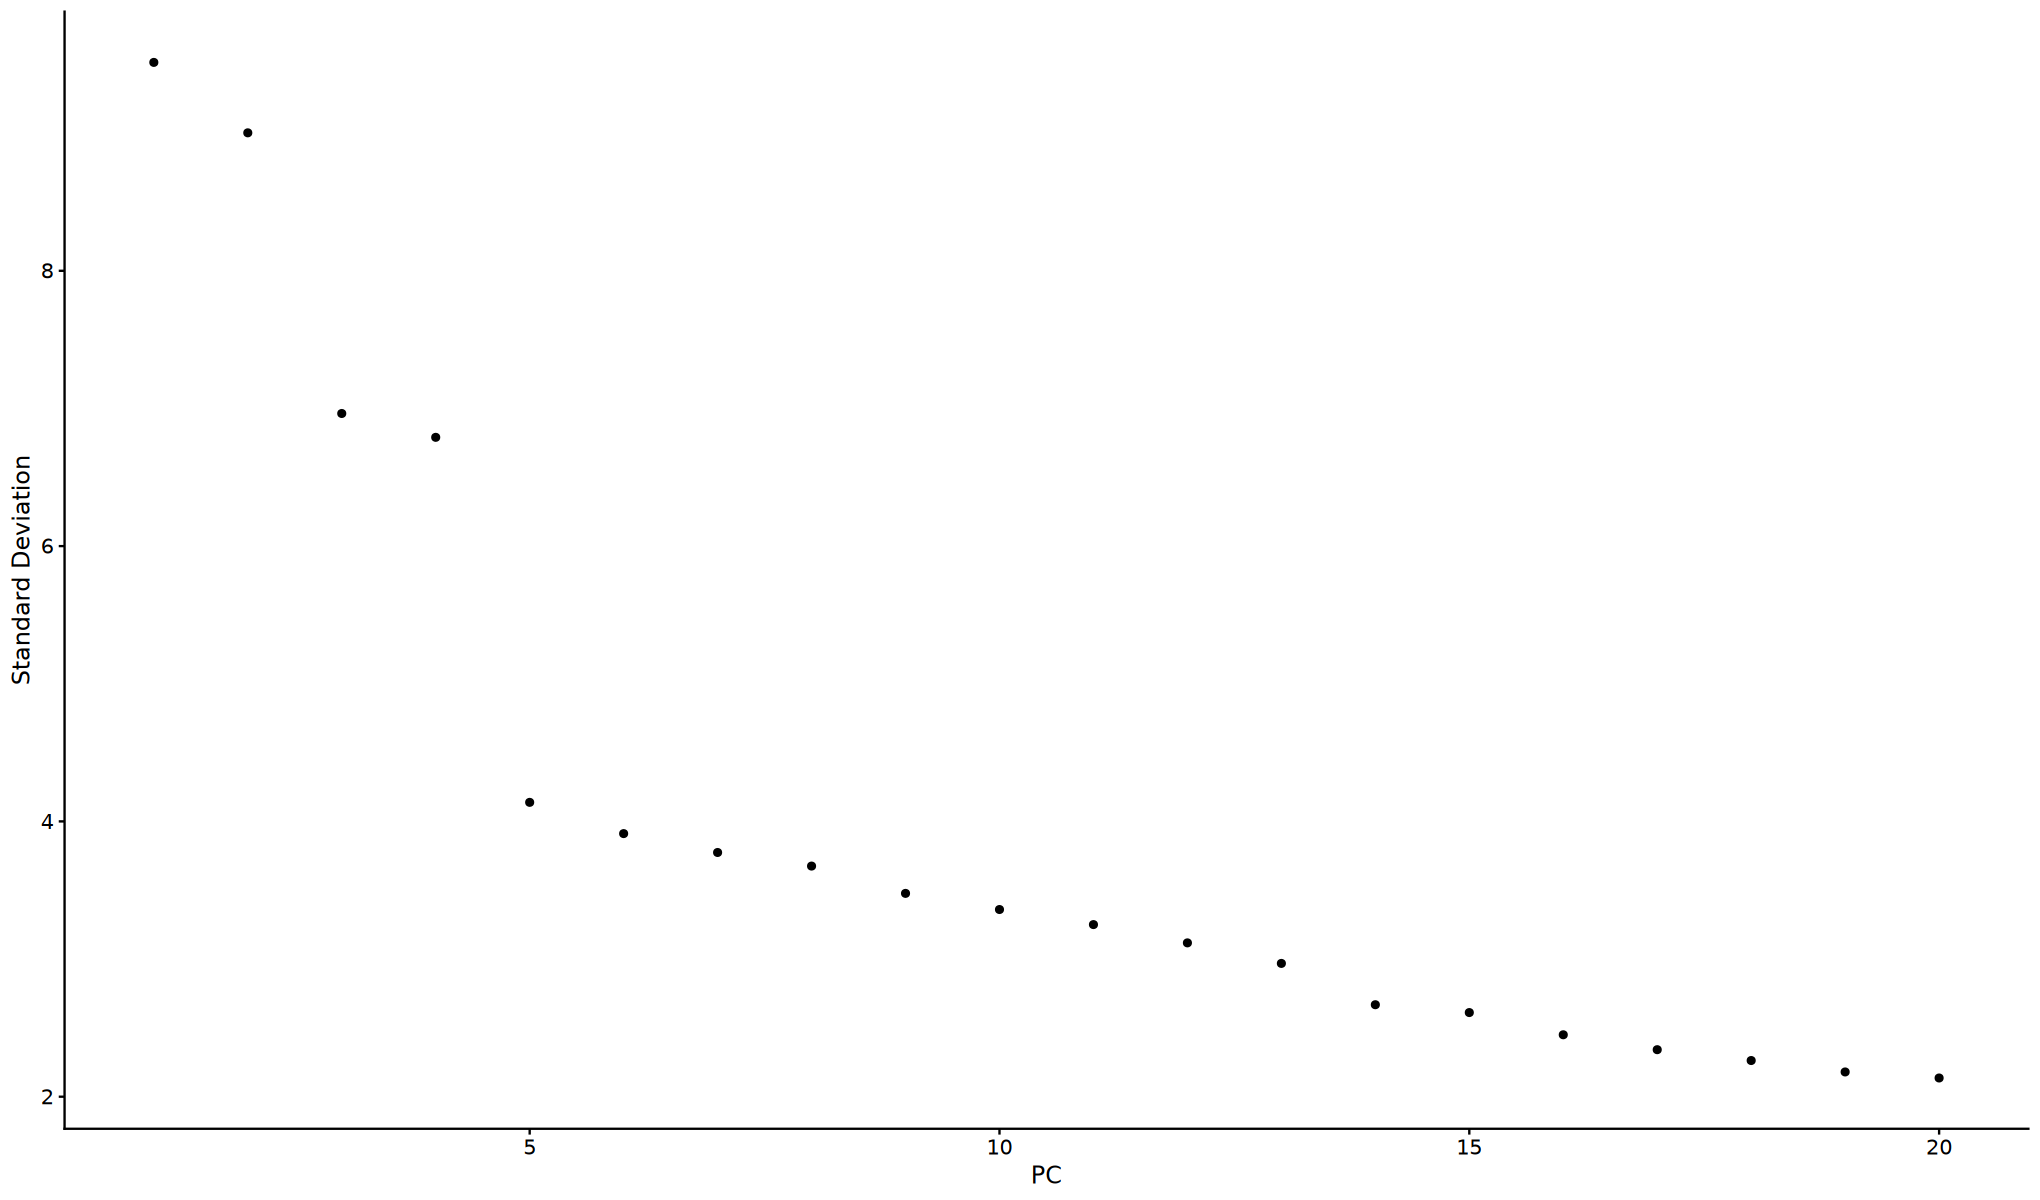

In [108]:
ElbowPlot(data_kuppe)

In [109]:
data_kuppe <- FindNeighbors(data_kuppe, dims = 1:20)
data_kuppe <- FindClusters(data_kuppe, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 119919
Number of edges: 3931167

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9463
Number of communities: 26
Elapsed time: 58 seconds


In [ ]:
data_kuppe <- RunUMAP(data_kuppe, dims = 1:20, reduction = "harmony", reduction.name = "umapharm")

In [111]:
data_kuppe$cells <- ifelse(data_kuppe$cells == "MPs", "Macrophages", data_kuppe$cells)

In [112]:
data_kuppe$cells <- as.factor(data_kuppe$cells)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



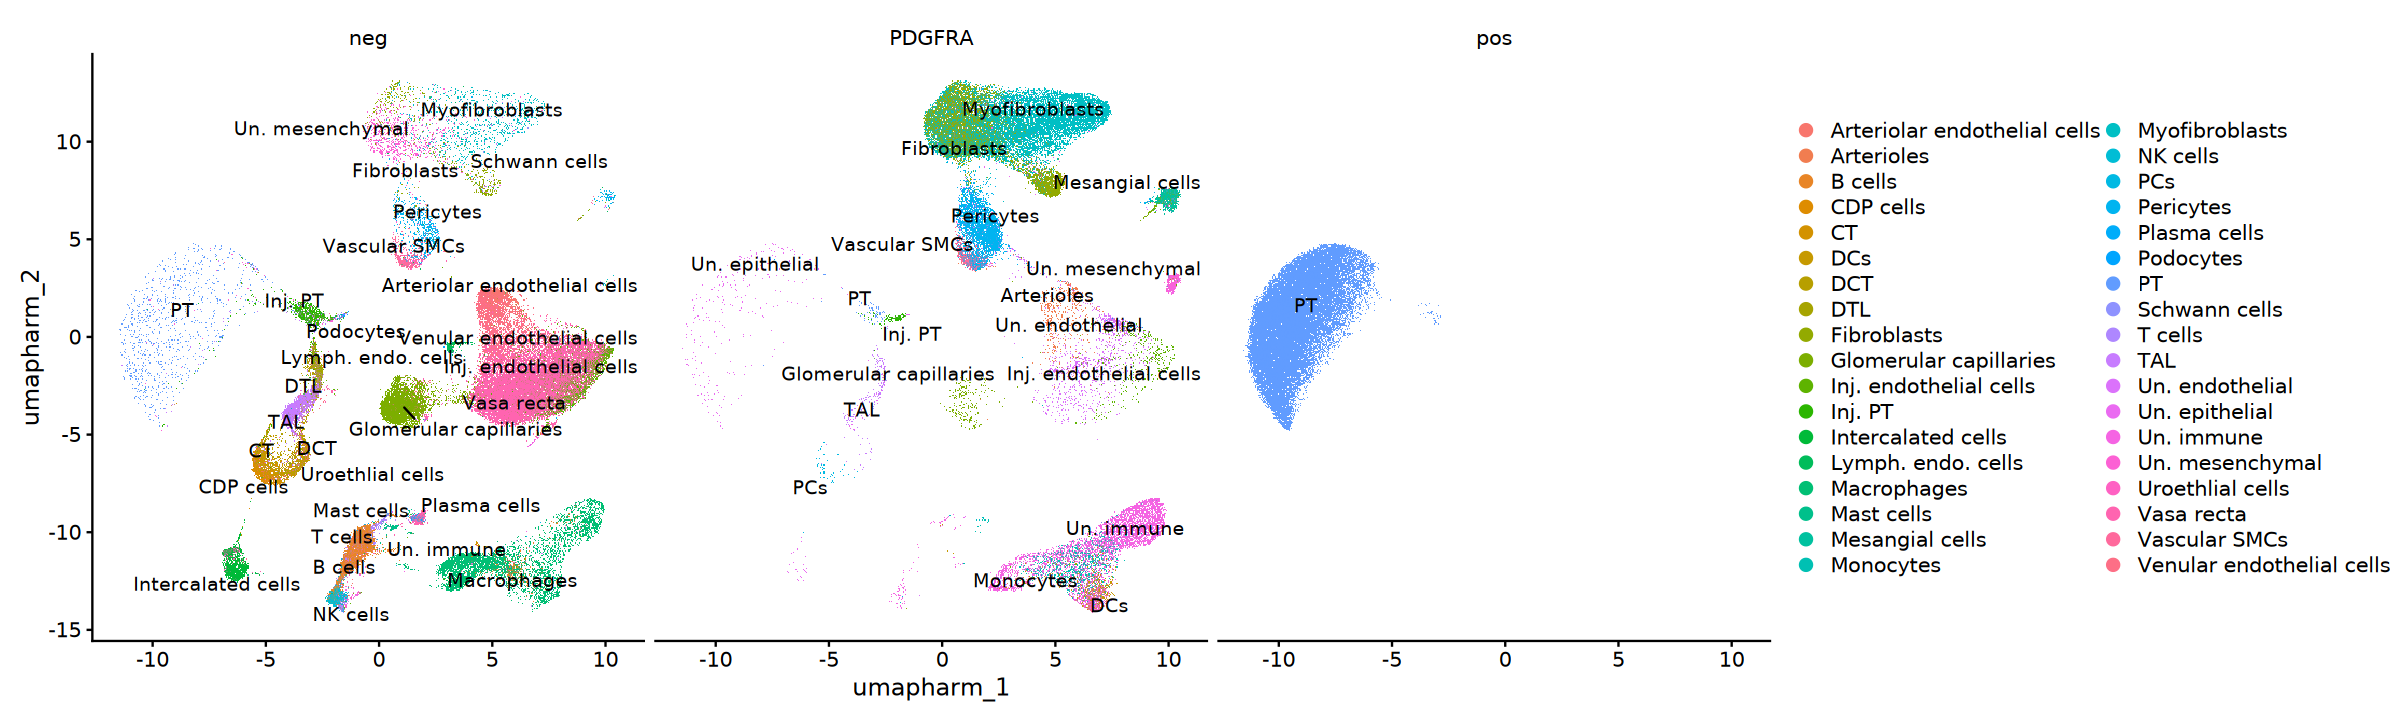

In [28]:
data_kuppe@active.ident <- data_kuppe$cells
options(repr.plot.width=20, repr.plot.height=6)
DimPlot(data_kuppe, reduction = "umapharm", split.by = "dataset", label = TRUE, repel = TRUE)

In [114]:
p1 <- DimPlot(data_kuppe, reduction = "umapharm", split.by = "dataset", label = TRUE, repel = TRUE)
ggsave("data_kuppe_int_umap_dataset_labelled.pdf", plot = p1, width = 20, height = 6)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [120]:
data_kuppe$condition <- as.factor(data_kuppe$condition)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



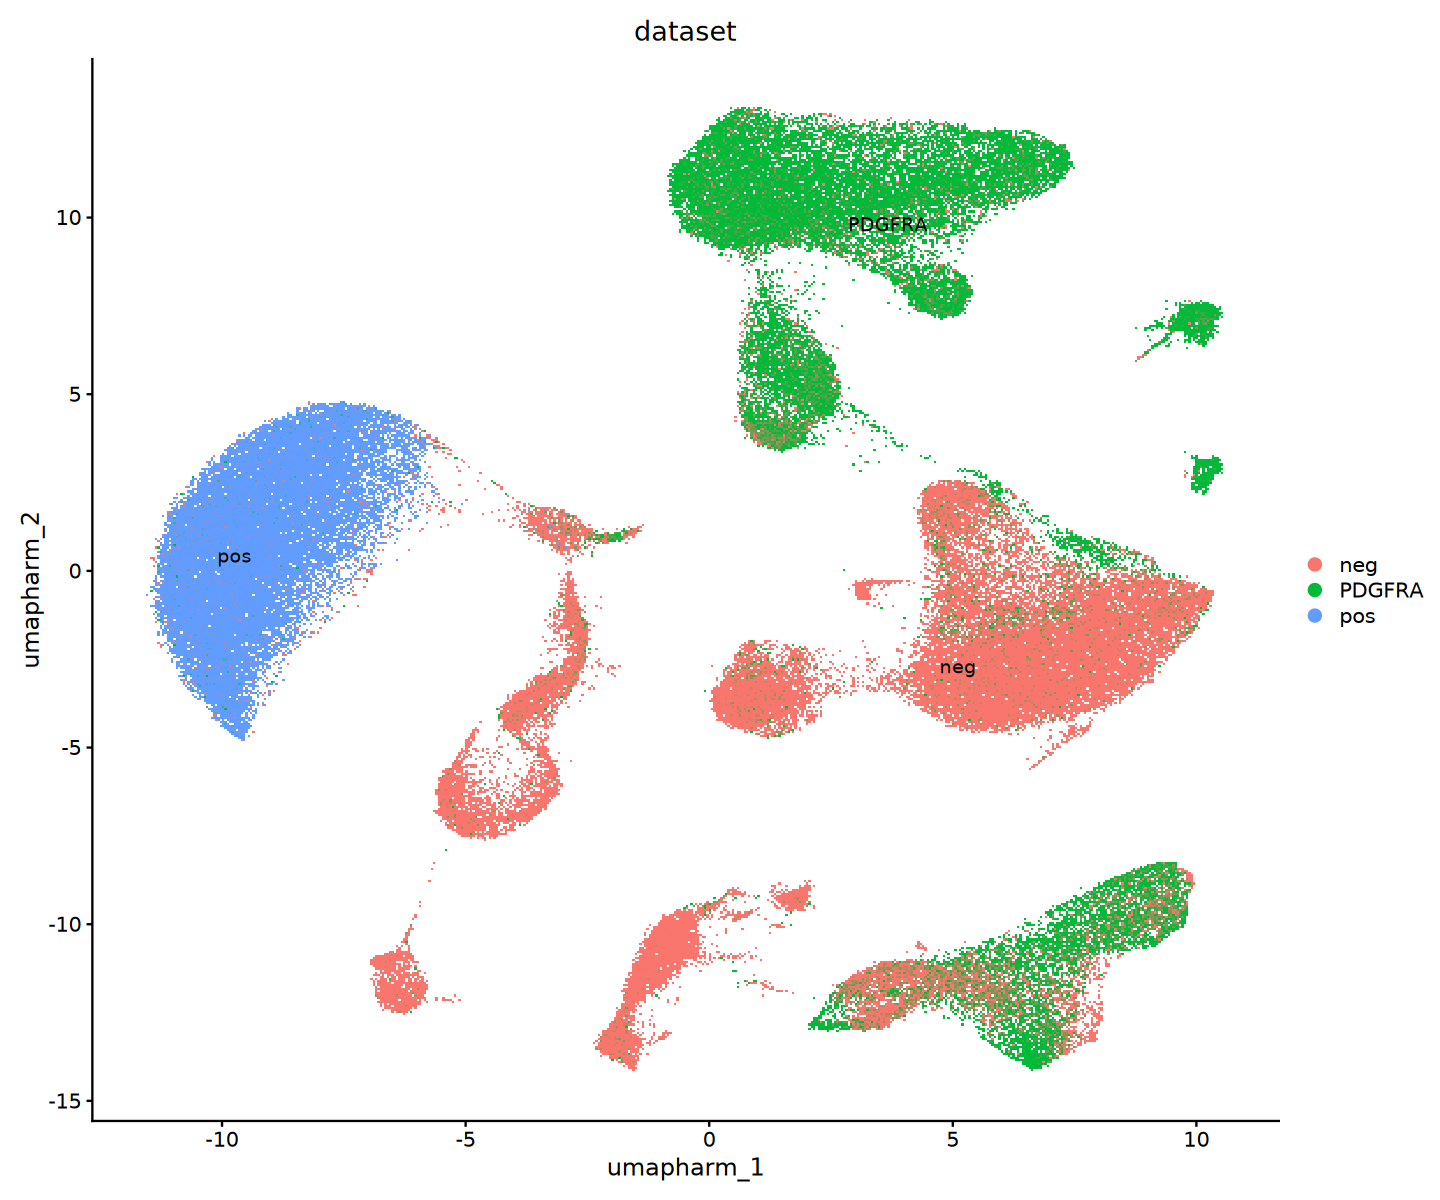

In [117]:
data_kuppe@active.ident <- data_kuppe$dataset
options(repr.plot.width=12, repr.plot.height=10)
DimPlot(data_kuppe, reduction = "umapharm", group.by = "dataset", label = TRUE, repel = TRUE)

In [121]:
p2 <- DimPlot(data_kuppe, reduction = "umapharm", group.by = "dataset", label = TRUE, repel = TRUE)
ggsave("data_kuppe_int_umap_datasets.pdf", plot = p2, width = 12, height = 10)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



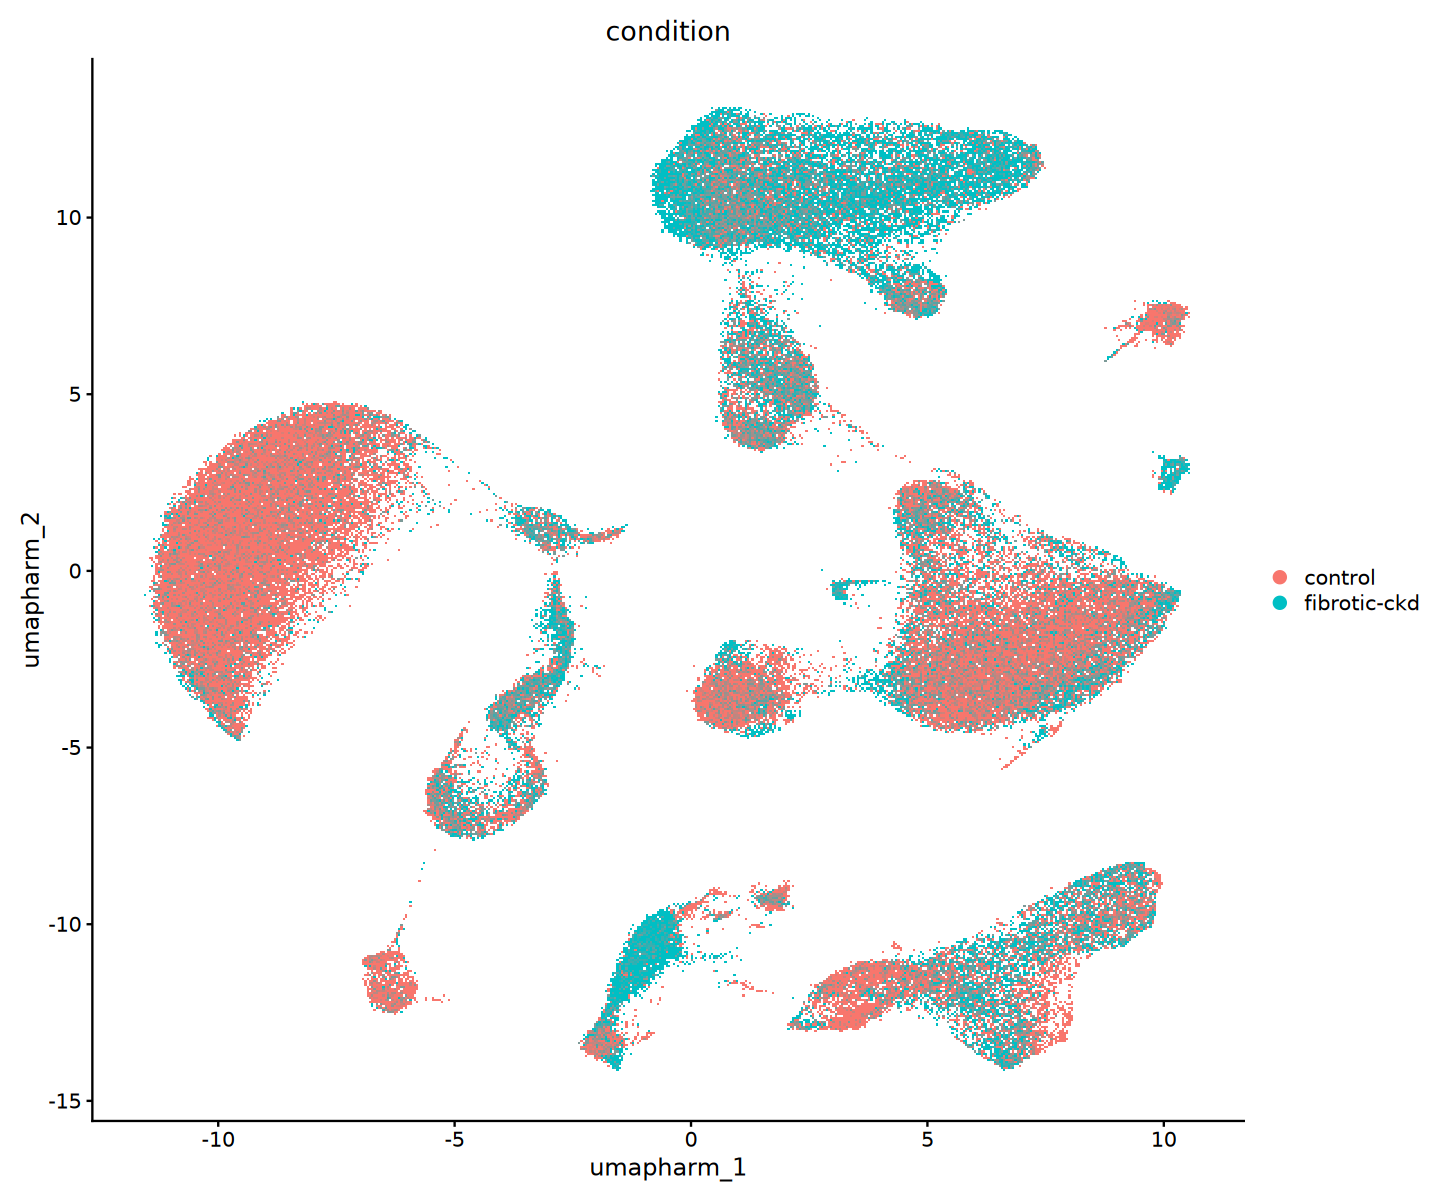

In [122]:
data_kuppe@active.ident <- data_kuppe$condition
options(repr.plot.width=12, repr.plot.height=10)
DimPlot(data_kuppe, reduction = "umapharm", group.by = "condition", label = FALSE, repel = FALSE)

In [123]:
p3 <- DimPlot(data_kuppe, reduction = "umapharm", group.by = "condition", label = FALSE, repel = FALSE)
ggsave("data_kuppe_int_umap_datasets_condition.pdf", plot = p3, width = 12, height = 10)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


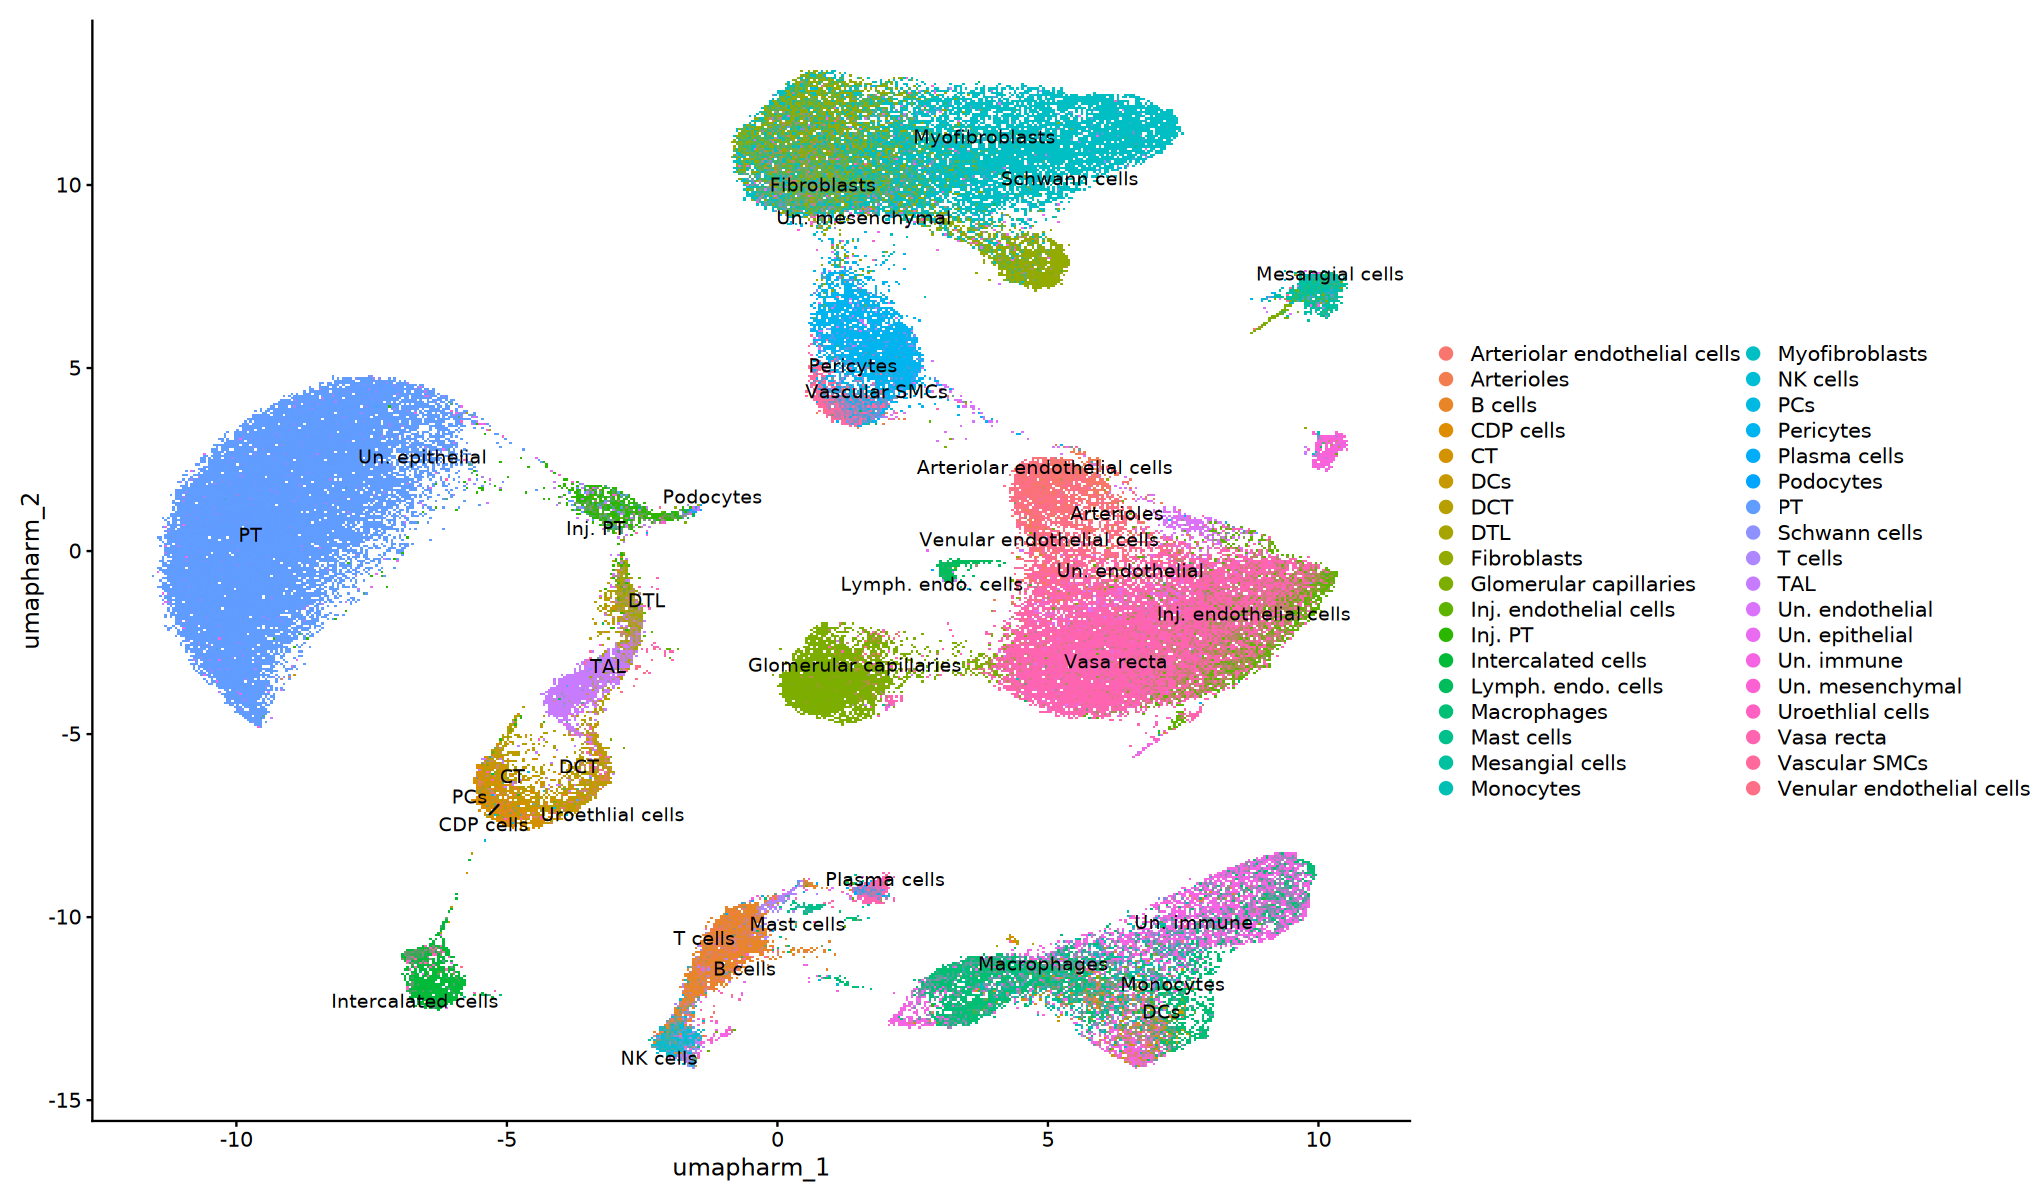

In [27]:
data_kuppe@active.ident <- data_kuppe$cells
options(repr.plot.width=17, repr.plot.height=10)
DimPlot(data_kuppe, reduction = "umapharm", label = TRUE, repel = TRUE)

In [125]:
p4 <- DimPlot(data_kuppe, reduction = "umapharm", label = TRUE, repel = TRUE)
ggsave("data_kuppe_int_umap_combined_labelled.pdf", plot = p4, width = 17, height = 10)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [126]:
save(data_kuppe, file = "data_kuppe_integrated.RData")

In [3]:
load("/dh-projects/ag-conrad/analysis/saal11/panfib/kuppe/data_kuppe_integrated.RData")

In [6]:
#Running UMAP without integration
data_kuppe <- RunUMAP(data_kuppe, dims = 1:20, reduction = "pca", reduction.name = "umappca")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:39:55 UMAP embedding parameters a = 0.9922 b = 1.112

11:39:55 Read 119919 rows and found 20 numeric columns

11:39:55 Using Annoy for neighbor search, n_neighbors = 30

11:39:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:40:06 Writing NN index file to temp file /tmp/Rtmp0tycpX/file1106cf5717235f

11:40:06 Searching Annoy index using 1 thread, search_k = 3000

11:40:43 Annoy recall = 100%

11:40:44 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbo

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


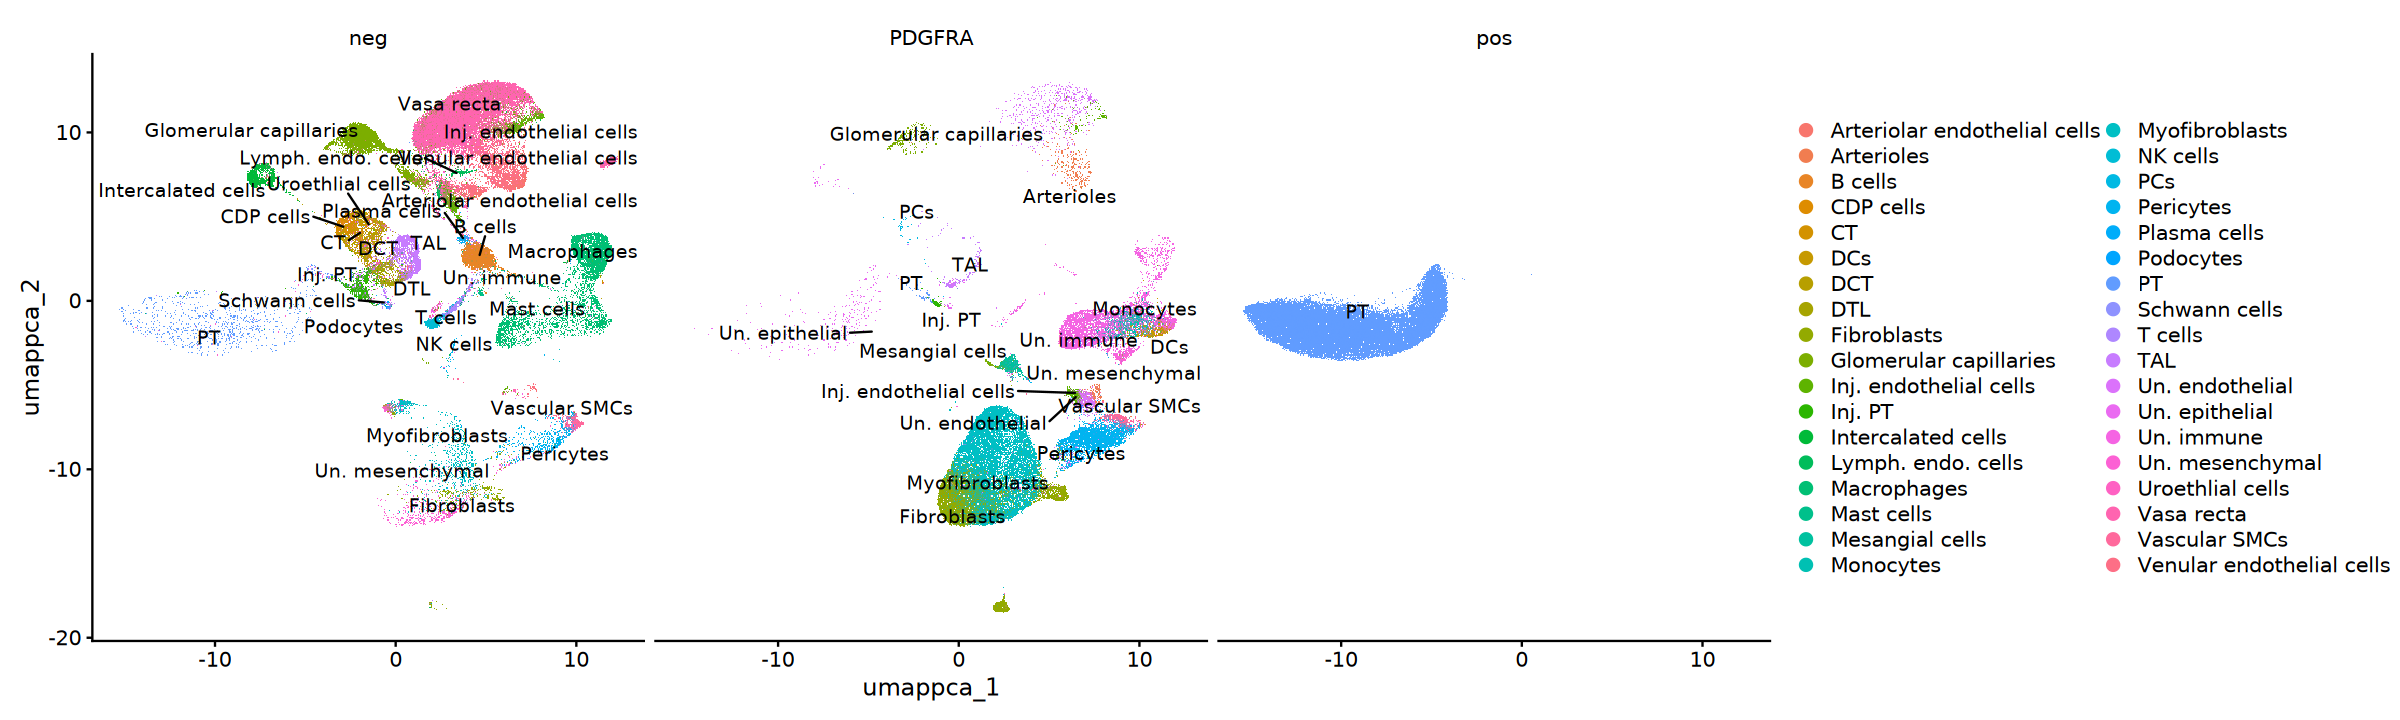

In [7]:
data_kuppe@active.ident <- data_kuppe$cells
options(repr.plot.width=20, repr.plot.height=6)
DimPlot(data_kuppe, reduction = "umappca", split.by = "dataset", label = TRUE, repel = TRUE)

In [9]:
p5 <- DimPlot(data_kuppe, reduction = "umappca", split.by = "dataset", label = TRUE, repel = TRUE)
ggsave("data_kuppe_nonint_umap_datasets.pdf", plot = p5, width = 20, height = 6)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [21]:
#Running UMAP on multiple batch corrections
data_kuppe <- RunUMAP(data_kuppe, dims = 1:20, reduction = "harmony2", reduction.name = "umapharm2")

14:00:03 UMAP embedding parameters a = 0.9922 b = 1.112

14:00:03 Read 119919 rows and found 20 numeric columns

14:00:03 Using Annoy for neighbor search, n_neighbors = 30

14:00:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:00:14 Writing NN index file to temp file /tmp/Rtmp0tycpX/file1106cf7c6995e0

14:00:14 Searching Annoy index using 1 thread, search_k = 3000

14:00:52 Annoy recall = 100%

14:00:52 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:00:56 Initializing from normalized Laplacian + noise (using RSpectra)

14:01:13 Commencing optimization for 200 epochs, with 5439950 positive edges

14:02:17 Optimization finished



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
“ggrepel: 5 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


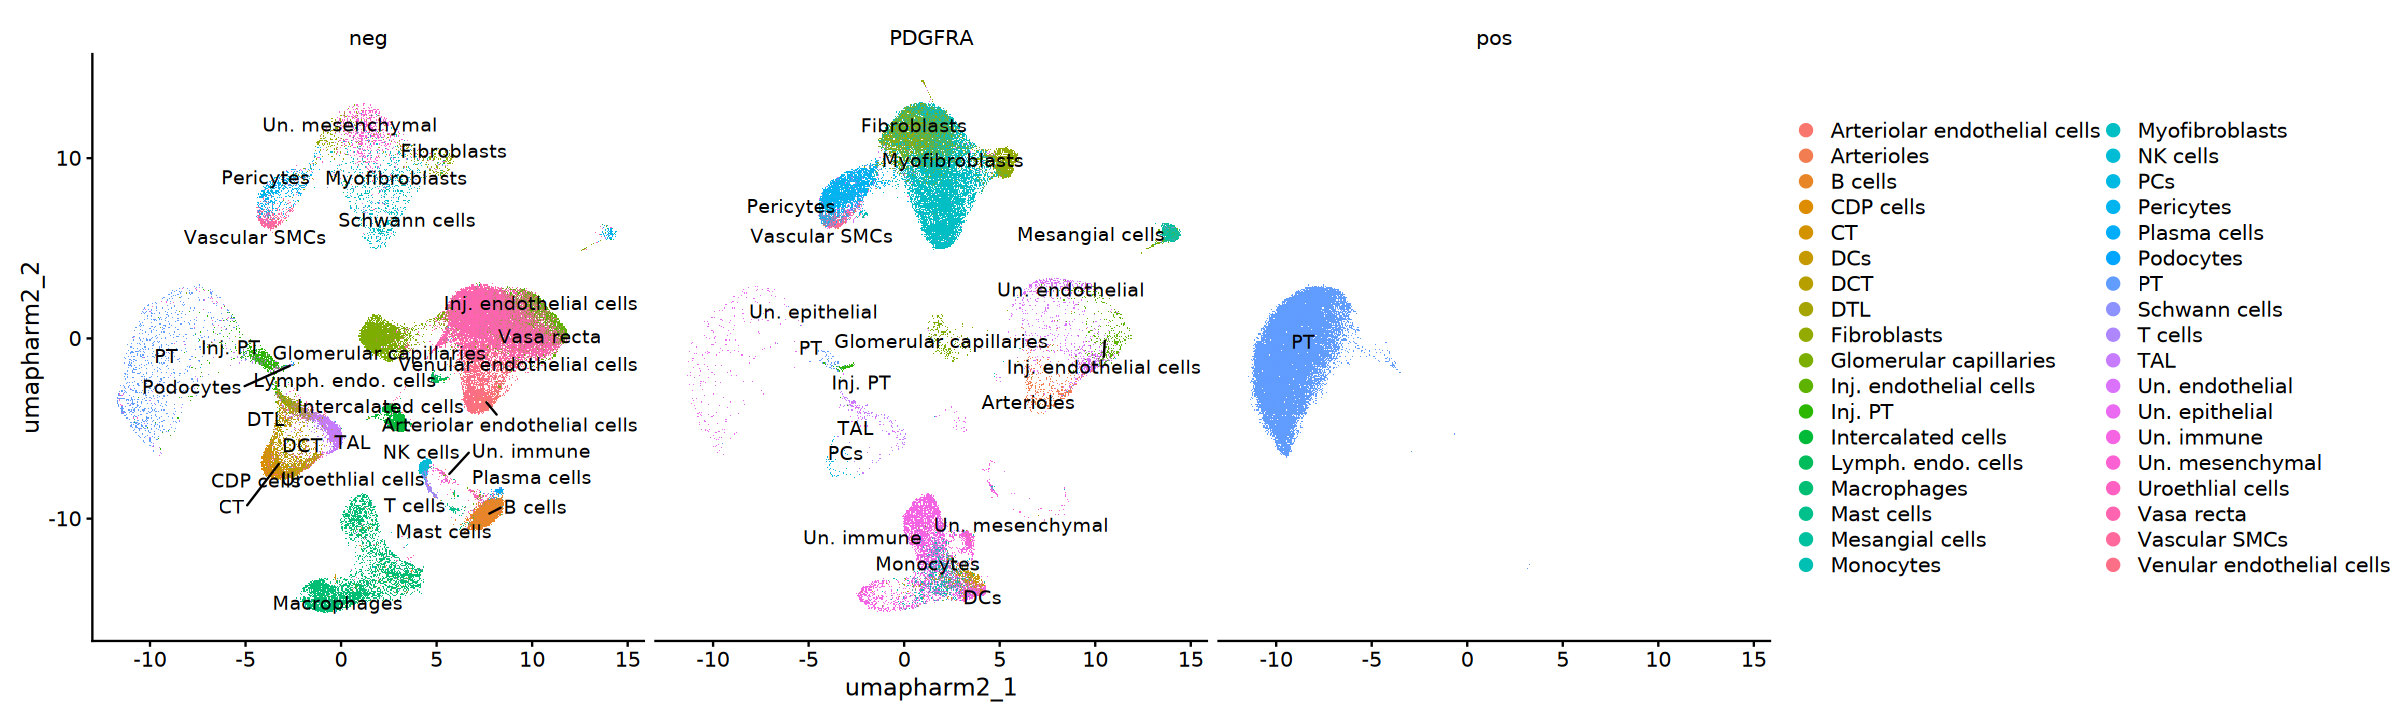

In [22]:
data_kuppe@active.ident <- data_kuppe$cells
options(repr.plot.width=20, repr.plot.height=6)
DimPlot(data_kuppe, reduction = "umapharm2", split.by = "dataset", label = TRUE, repel = TRUE)

In [23]:
p6 <- DimPlot(data_kuppe, reduction = "umapharm2", split.by = "dataset", label = TRUE, repel = TRUE)
ggsave("data_kuppe_int_umap_datasets_2vars.pdf", plot = p6, width = 20, height = 6)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [24]:
data_kuppe

An object of class Seurat 
58228 features across 119919 samples within 1 assay 
Active assay: RNA (58228 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 6 dimensional reductions calculated: pca, harmony, umapharm, umappca, harmony2, umapharm2

In [30]:
length(rownames(data_kuppe_pos))

[1] 58228

In [31]:
#Ensembel ID removal
data_kuppe@active.assay <- "RNA"
gene_names <- strsplit(rownames(data_kuppe), ";")
clean_gene_names <- sapply(gene_names, function(x) {
  if (length(x) > 1) {
    return(x[2]) # Select the part after the semicolon
  } else {
    return(x)
  }
})

In [32]:
head(clean_gene_names)

[1] "DDX11L1"     "WASH7P"      "MIR6859-1"   "MIR1302-2HG" "MIR1302-2"  
[6] "FAM138A"

In [33]:
data_matrix <- data_kuppe@assays$RNA@data

In [34]:
str(data_matrix)

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:213202956] 36 57 62 63 66 81 82 86 88 92 ...
  ..@ p       : int [1:119920] 0 8319 16169 23833 31597 39519 46657 54192 61396 68523 ...
  ..@ Dim     : int [1:2] 58228 119919
  ..@ Dimnames:List of 2
  .. ..$ : chr [1:58228] "ENSG00000223972.5;DDX11L1" "ENSG00000227232.5;WASH7P" "ENSG00000278267.1;MIR6859-1" "ENSG00000243485.5;MIR1302-2HG" ...
  .. ..$ : chr [1:119919] "TCACTCGGTCTGTTAG-Pb1" "TCATTTGAGTAACGAT-Pb1" "CATCCGTCACAAGCAG-Pb1" "TCCCACAAGTCCCAAT-Pb1" ...
  ..@ x       : num [1:213202956] 3.231 0.217 0.899 0.899 0.217 ...
  ..@ factors : list()


In [28]:
data_kuppe@active.assay <- "RNA"
rownames_kuppe <- list(rownames(data_kuppe))
write.xlsx(rownames_kuppe, "GeneIDs_kuppe_original.xlsx")

In [32]:
clean_gene_names_list <- list(clean_gene_names)
write.xlsx(clean_gene_names_list, "GeneIDs_kuppe_clean.xlsx")

In [69]:
save(data_kuppe, file = "data_kuppe_integrated.RData")